# Experiment 9
**Aim**: WAP to implement Logistic Regression.

# Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1".

## Logistic Function

The logistic function is given by:

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

The logistic function is useful because it can take any real input $x$ and output a value between zero and one, representing a probability. This is useful for classification problems, where we want to assign an input to one of two classes. For example, we might want to classify an email as either spam or not spam. We can use the logistic function to give us the probability that an email is spam given its features.

In [2]:
# importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap

In [5]:
# Create synthetic data for classification
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Create and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [8]:
# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

In [9]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


In [11]:
# Create a mesh grid for visualization
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class for each point in the mesh grid
Z = logistic_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

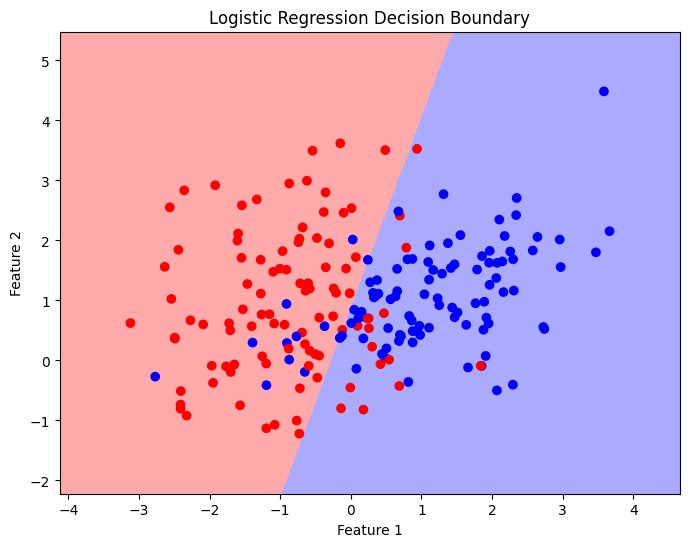

In [12]:
# Plot the decision boundary and data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

In [15]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")

# Pretty-print the confusion matrix as a Pandas DataFrame
import pandas as pd
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(cm_df)

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           18            5
Actual 1            0           17
